# Linear Regression
> Building and training of the linear regression model on a toy dataset
>
> **Table of Contents**
>> 1. Import Necessary Library Modules
>>
>> 2. Initillize the Dataset
>>
>> 3. Define a Linear Regression Model
>>
>> 4. Define a Loss Function and Optimizer
>>
>> 5. Train the Linear Regression Model
>>
>> 6. Get the Predictions of the Trained Linear Regression Model
>>
>> 7. Plot the Results of the Trained Linear Regression Model
>>
>> 8. Save the Current Model Checkpoint

## Import Necessary Library Modules

> Before doing anything, we must take note of the needed library modules and import them to our environment

In [1]:
#Torch library needed for machine learning
import torch

#Numpy needed for data initiallization
import numpy as np

#Matplotlib.Pyplot needed for plotting functionality
import matplotlib.pyplot as plt

## Initiallize the Dataset

> First step is to initiallize the dataset, creating two np arrays: one for training features and one for the corresponding labels

In [2]:
#Initiallize the training data for x (feature matrix)
x_train = np.array(
    [
        [3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
        [9.779], [6.182], [7.59], [2.167], [7.042], 
        [10.791], [5.313], [7.997], [3.1]
    ],
    dtype=np.float32
)

#Initiallize the training data for the y (label vector)
y_train = np.array(
    [
        [1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
        [3.366], [2.596], [2.53], [1.221], [2.827], 
        [3.465], [1.65], [2.904], [1.3]
    ],
    dtype=np.float32
)

## Define a Linear Regression Model

> Specify the hyperparameters (parameters that describe how the model generates parameters) an instantiate the model

In [3]:
#First we need to specify the hyperparameters we want for our linear regression model
input_size = 1
output_size = 1

#Next, we need to instantiate our model with the defined hyperparameters
LinRegModel = torch.nn.Linear(input_size, output_size)

## Define a Loss Function and Optimizer

> After defining our model, we must then define the loss function that we will use to compute the total error between the predicted and true labels

In [4]:
#Define our loss function as the mean-square error (MSE)
lossFunction = torch.nn.MSELoss()

> We must also define an optimizer which will go about updating our model parameters after running through a given batch of the training data.
>
>For an optimizer, we can define another hyperparameter for the step size of each update (called the learning rate).

In [5]:
#Specify the hyperparameter related to the optimizer (learning rate)
learning_rate = 0.001

#Instantiate an SDG optimizer for the linear regression model
optimizer = torch.optim.SGD(LinRegModel.parameters(), lr=learning_rate)

## Train the Linear Regression Model

> With the model, losss function, optimizer, and related hyperparameters defined, the last step is to train the model ny iterating through our training data.
>
> There are two additional hyperparameters which dictate how we iterate through the training data:
>> Batch Size: can be thought of as the number of subsets we split the training data into, performing an update of the parameters after training on each subset
>>
>> Number of Epochs: The number of times that we iterate over the entire dataset
>
> Combining the two, this means we expect to update the parameters of the model (Epochs)*(Batch Size) number of times

In [10]:
#Define the hyperparameters for training the model (updating the parameters)
batch_size = 1
num_epochs = 60

#Train the model
#Loop over entire dataset for as many number of epochs
for epoch in range(num_epochs):
    #Slip dataset into batch_size number of batch and loop over each one
    for batch in range(batch_size):
        #Calculate the starting and ending index of the batch for the current iteration of the loop
        start_index = int((batch/batch_size)*y_train.size)
        end_index = int(((batch+1)/batch_size)*y_train.size)
        
        #Get the x and y training batches for the current iteration of the loop
        x_train_batch = x_train[start_index:end_index,:]
        y_train_batch = y_train[start_index:end_index]

        #Convert the numpy array batches into pytorch tensor objects
        inputs = torch.from_numpy(x_train_batch)
        targets = torch.from_numpy(y_train_batch)

        #Perform a forward propogation with the batch
        outputs = LinRegModel(inputs)

        #Compute the total loss of the current model predictions to the targets
        loss = lossFunction(outputs, targets)

        #Reset the gradient of the optimizer to assume a fresh start
        optimizer.zero_grad()

        #Now Perform backward propogation from the loss to determine the stochastic gradient descent step
        loss.backward()

        #Lastly, perform a SGD step via the optimizer
        optimizer.step()

        #Print the loss after every 5 epochs
        if((epoch + 1) % 5 == 0):
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")

Epoch [5/60], Loss: 2.9900896549224854
Epoch [10/60], Loss: 1.349678635597229
Epoch [15/60], Loss: 0.6850249171257019
Epoch [20/60], Loss: 0.41566601395606995
Epoch [25/60], Loss: 0.3064478635787964
Epoch [30/60], Loss: 0.2621055543422699
Epoch [35/60], Loss: 0.24404551088809967
Epoch [40/60], Loss: 0.23663330078125
Epoch [45/60], Loss: 0.2335348278284073
Epoch [50/60], Loss: 0.23218420147895813
Epoch [55/60], Loss: 0.23154187202453613
Epoch [60/60], Loss: 0.23118679225444794


## Get the Predictions of the Trained Linear Regression Model

> Now that the model has been fully trained, the next step is to see the predictions it makes on the training feature vectors

In [13]:
#First get the prediction tensor of the trained model
predictions = LinRegModel(torch.from_numpy(x_train))

#Then detatch the tensor to prevent unwanted changes upon analysis
predictions = predictions.detach()

#Finally, convert the tensor back into a numpy array
predictions = predictions.numpy()


## Plot the Results of the Trained Linear Regression Model

> We can now plot the predictions of the trained model against the true labels to see how they compare

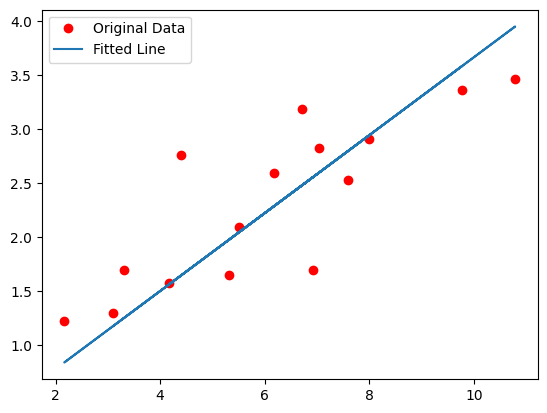

In [14]:
#Plot the comparison between the true labels and the predictions made by the trained model
plt.plot(x_train, y_train, "ro", label="Original Data")
plt.plot(x_train, predictions, label="Fitted Line")
plt.legend()
plt.show()

## Save the Current Model Checkpoint

> We have the option to save the current model to that we can reload the parameters and do not need to retrain it.
>
> This is very useful for large models that require long training periods or sharing models with others

In [15]:
#Save the model checkpoint
torch.save(LinRegModel.state_dict(), "LinRegModel.ckpt")